In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import birdsonganalysis as bsa
from os.path import join
from scipy.io import wavfile
import pickle
from pprint import pprint


import sys

sys.path.append('../model/hillclimbing/')

from song_fitter import SongModel

sns.set_palette('colorblind')

In [43]:
path = '../model/hillclimbing/res/170306_171900_sanity_run/'

In [44]:
sr, tutor = wavfile.read(join(path, 'tutor.wav'))
with open(join(path, 'params.pkl'), 'rb') as f:
    run_param = pickle.load(f)

In [45]:
pprint(run_param)

{'concurrent': 3,
 'days': 30,
 'iter_per_train': 10,
 'name': 'sanity_run',
 'replay': 5,
 'seed': 1488817140,
 'sr': 44100,
 'train_per_day': 100,
 'tutor': array([-10,   2,  15, ...,   3,  -8, -15], dtype=int16)}


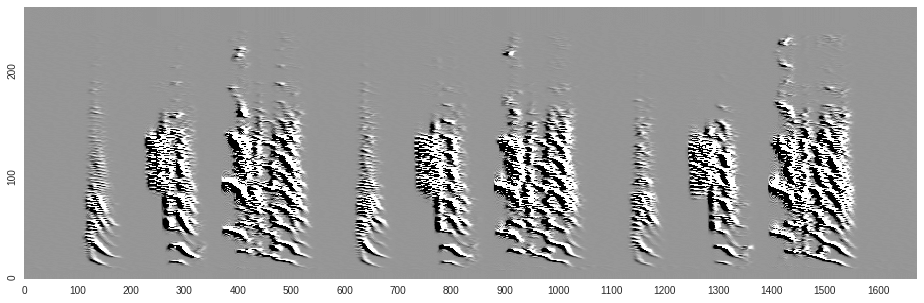

In [46]:
tspec = bsa.spectral_derivs(tutor, 256, 40, 1024)
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=ax)
plt.show(fig)
plt.close(fig)

In [47]:
outputs = []
for i in range(run_param['concurrent']):
    outputs.append(wavfile.read(join(path, 'out_{}.wav'.format(i)))[1])

0.033488045007
0.0318846694796
0.0624613220816


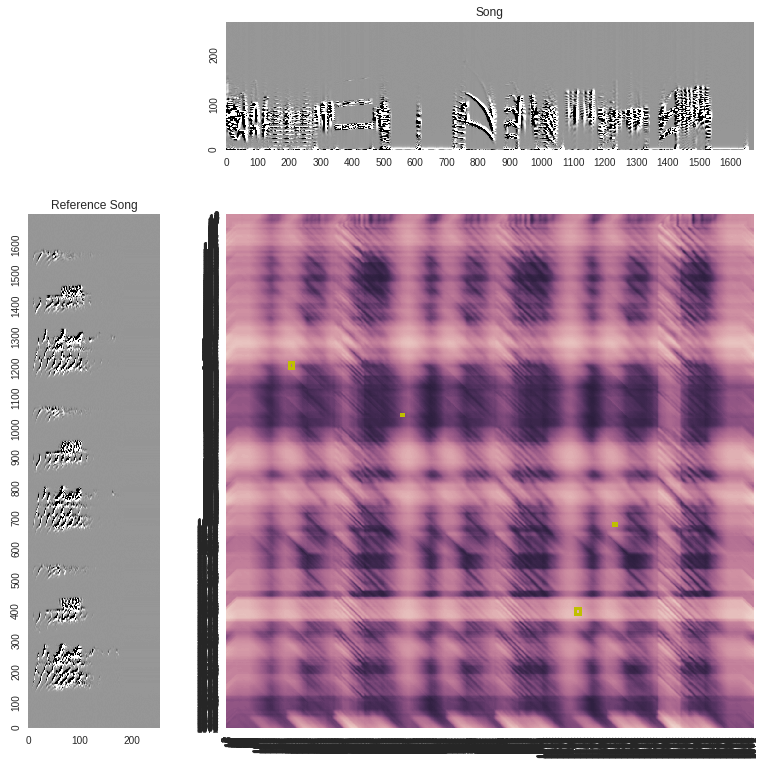

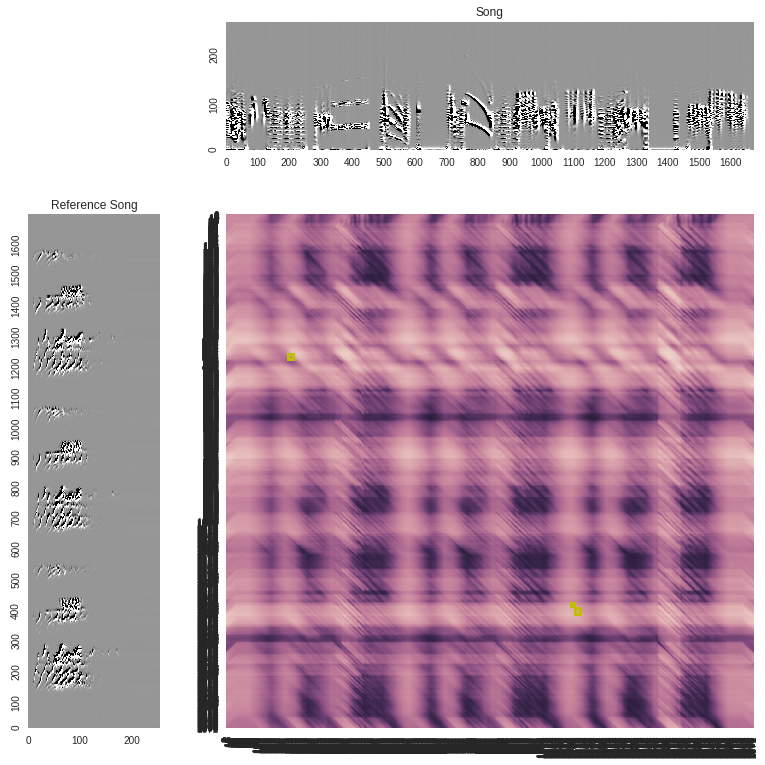

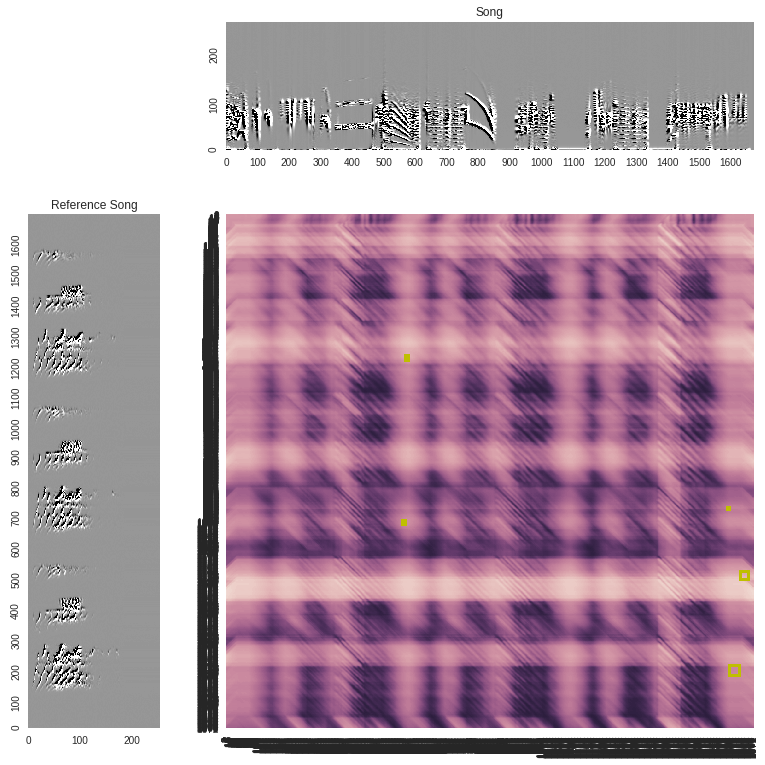

In [23]:
for out in outputs:
    sim = bsa.similarity(out, tutor)
    bsa.similarity_plot(sim, out, tutor)
    print(sim['similarity'])

In [24]:
out = outputs[0]

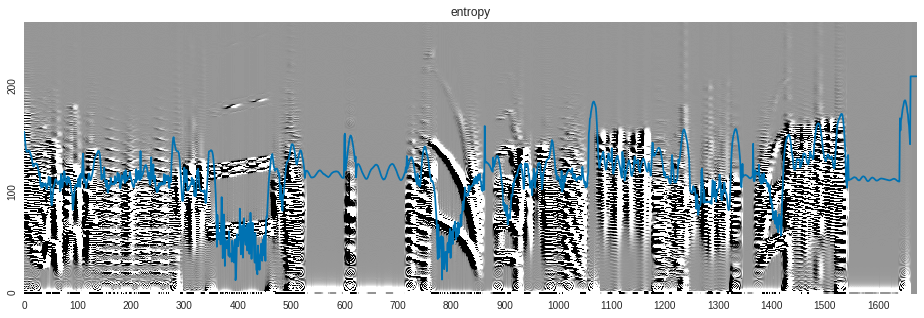

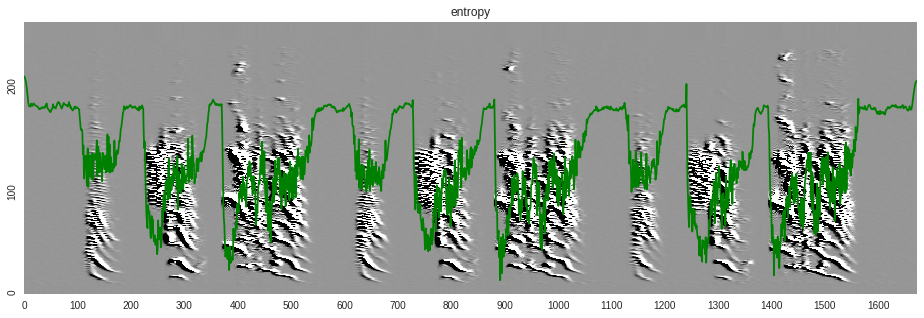

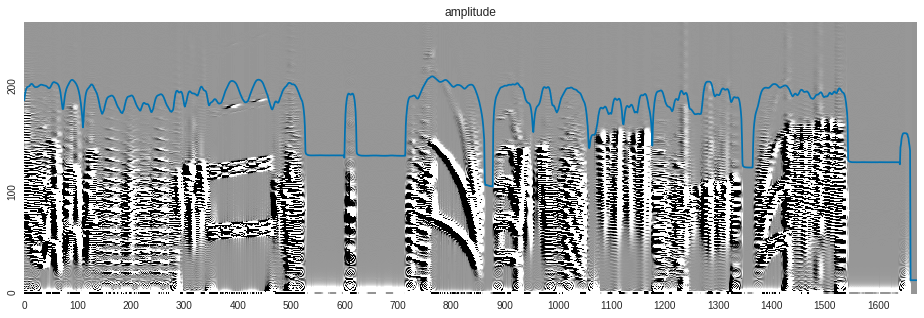

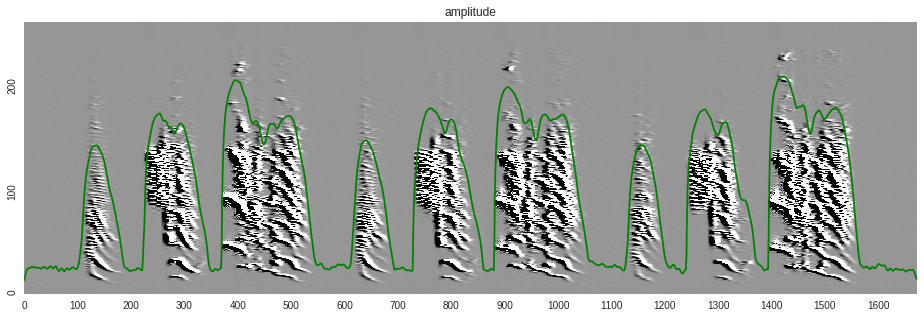

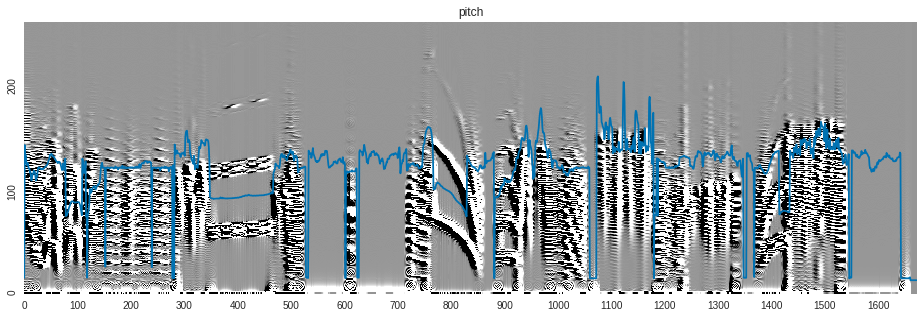

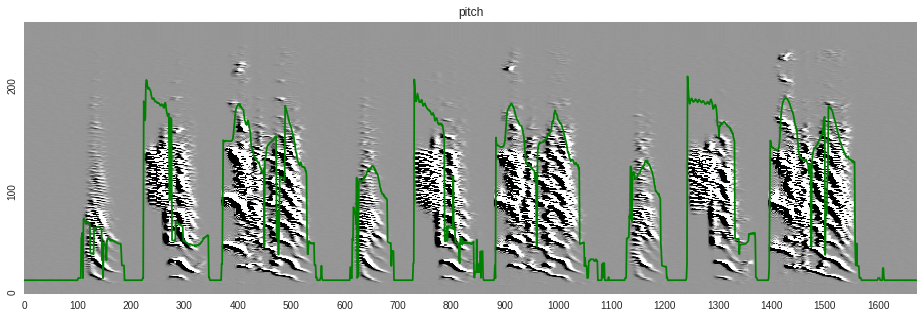

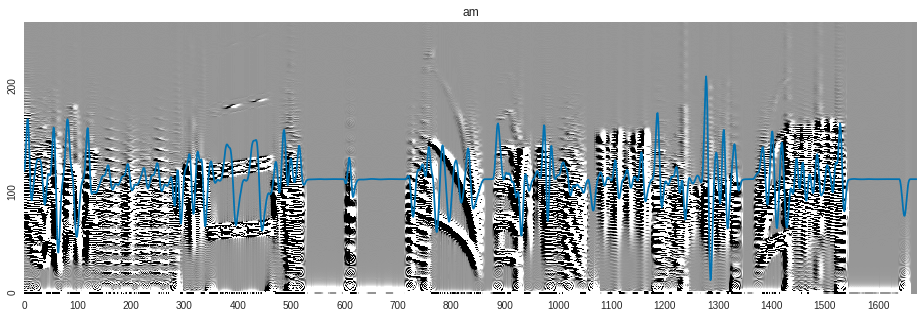

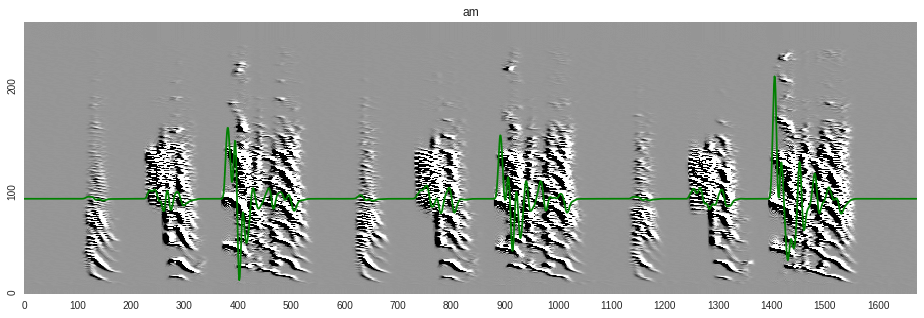

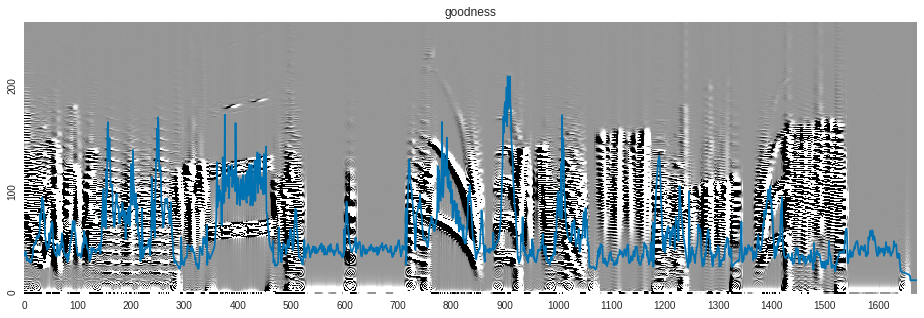

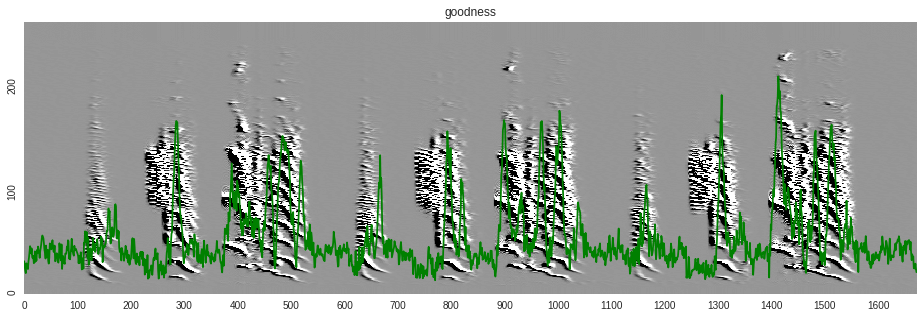

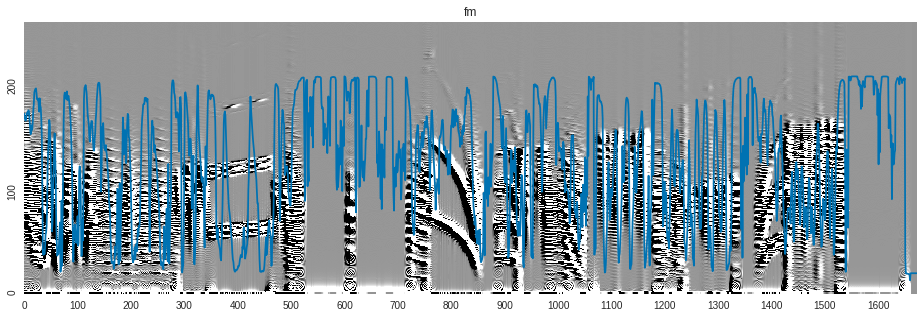

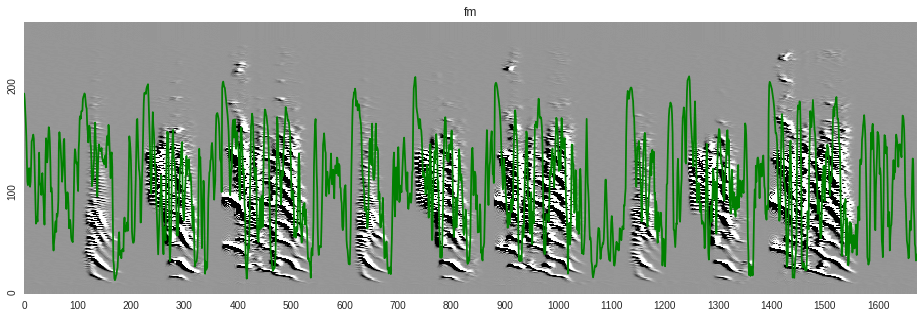

In [48]:
tfeat = bsa.all_song_features(tutor, 256, 40, 1024)
spec = bsa.spectral_derivs(out, 256, 40, 1024)
for name, value in bsa.all_song_features(out, 256, 40, 1024).items():
    fig = plt.figure(figsize=(16, 5))
    ax = fig.gca()
    ax = bsa.spectral_derivs_plot(spec, contrast=0.01, ax=ax)
    bsa.plot_over_spec(value, ax)
    #ax.plot(tfeat[name])
    ax.set_title(name)
    fig = plt.figure(figsize=(16, 5))
    ax = fig.gca()
    ax = bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=ax)
    bsa.plot_over_spec(tfeat[name], ax, color='g')
    #ax.plot(tfeat[name])
    ax.set_title(name)
    

In [49]:
with open(join(path, 'songs.pkl'), 'rb') as f:
    smodels = pickle.load(f)

In [50]:
len(smodels[2].gestures)

29

In [51]:
import synth

In [52]:

ab = []
for i, gesture in enumerate(smodels[0].gestures):
    p = gesture[1]
    start = gesture[0]
    try:
        end = smodels[0].gestures[i+1][0]
    except IndexError:
        end = len(tutor)
    size = end - start
    ab.append(synth.gen_alphabeta(p, size, falpha=lambda x, p: synth.only_sin(x, p, nb_sin=3),
                fbeta=lambda x, p: synth.only_sin(x, p, nb_sin=1),
                falpha_nb_args=13))
ab = np.concatenate(ab)

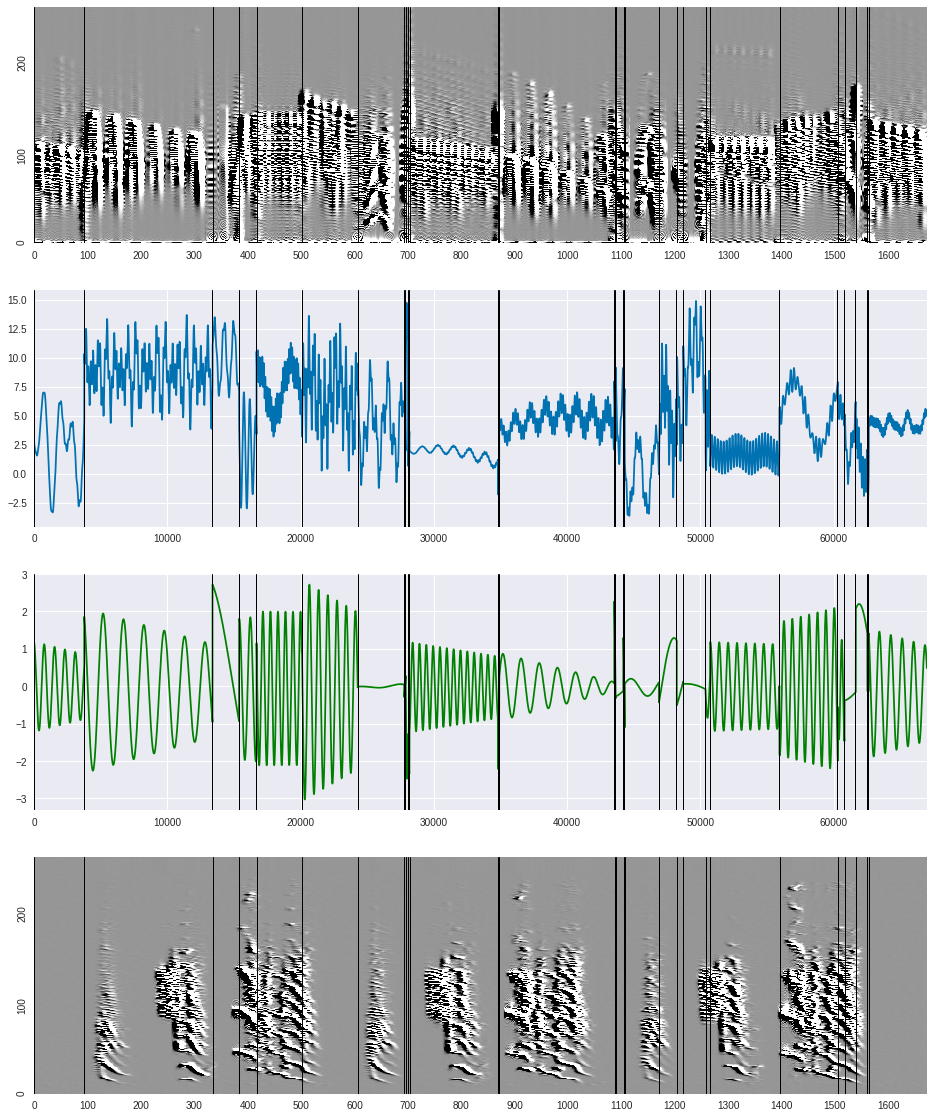

In [53]:
fig, axs = plt.subplots(4, 1, figsize=(16, 20))
ospec = bsa.spectral_derivs(outputs[0], 256, 40, 1024)
bsa.spectral_derivs_plot(ospec, contrast=0.01, ax=axs[0])
axs[0].set_xlim(0, ospec.shape[0])
axs[1].plot(ab[:, 0])
axs[1].set_xlim((0, ab.shape[0]))
axs[2].plot(ab[:, 1], color="g")
axs[2].set_xlim((0, ab.shape[0]))
bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=axs[3])
for i, gesture in enumerate(smodels[0].gestures):
    start = gesture[0]
    axs[0].axvline(x=start/40, color="k", linewidth=1)
    axs[1].axvline(x=start, color="k", linewidth=1)
    axs[2].axvline(x=start, color="k", linewidth=1)
    axs[3].axvline(x=start/40, color="k", linewidth=1)

In [54]:
tutor_params = np.loadtxt('../data/ba_example_ab.dat')

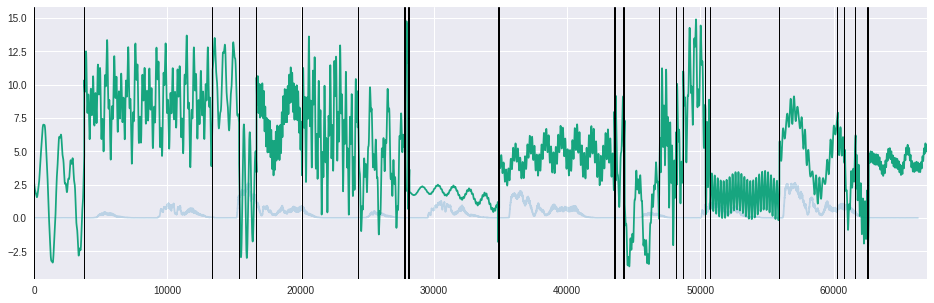

In [55]:
plt.figure(figsize=(16, 5))
plt.plot(tutor_params[:, 0], alpha=0.2)
plt.plot(ab[:, 0], alpha=0.9)
plt.xlim(0, ab.shape[0])
for i, gesture in enumerate(smodels[0].gestures):
    start = gesture[0]
    plt.axvline(x=start, color="k", linewidth=1)

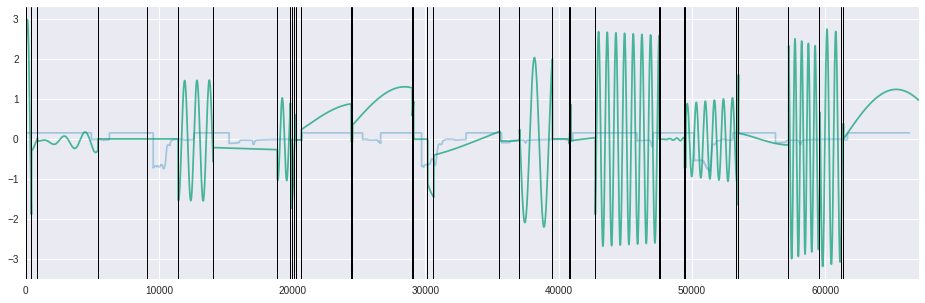

In [38]:
plt.figure(figsize=(16, 5))
plt.plot(tutor_params[:, 1], alpha=0.3)
plt.plot(ab[:, 1], alpha=0.7)
plt.xlim(0, ab.shape[0])
for i, gesture in enumerate(smodels[0].gestures):
    start = gesture[0]
    plt.axvline(x=start, color="k", linewidth=1)

In [39]:
gtes = np.loadtxt('../data/ba_example_gte.dat')
true_gtes = gtes[np.concatenate(((np.diff(gtes) > 100), (False,)))]

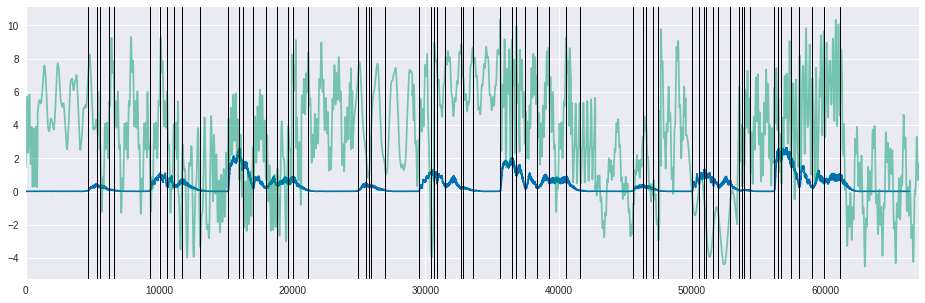

In [40]:
plt.figure(figsize=(16, 5))
plt.plot(tutor_params[:, 0])
plt.plot(ab[:, 0], alpha=0.5)
plt.xlim(0, ab.shape[0])
for gte in true_gtes:
    start = gesture[0]
    plt.axvline(x=gte, color="k", linewidth=1)

In [41]:
len(true_gtes)

65

In [42]:
np.mean(np.diff(true_gtes))

881.453125